In [ ]:
pip install infomap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached infomap-2.7.1.tar.gz (263 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=8809047 sha256=7df8b0619c843fd0ec79821a2deb520b424376b530806930e44ba8985d7203a7
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

drive/  sample_data/


In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import igraph as ig
from igraph import Graph
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import community as community_louvain

In [ ]:
da_path = '/content/drive/MyDrive/facebook_combined.txt'
g = nx.read_edgelist(da_path, create_using=nx.Graph(), nodetype=int)
number_of_nodes = nx.number_of_nodes(g)
number_of_edges = nx.number_of_edges(g)

print(f"Number of nodes: {number_of_nodes}")
print(f"Number of edges: {number_of_edges}")

Number of nodes: 4039
Number of edges: 88234


In [ ]:
is_connected = nx.is_connected(g)
print(f"The graph connected? {is_connected}")

The graph connected? True


In [ ]:
if is_connected:
    diameter = nx.diameter(g)
else:
    diameter = "undefined (graph not connected)"

print(f"Diameter of the graph: {diameter}")

Diameter of the graph: 8


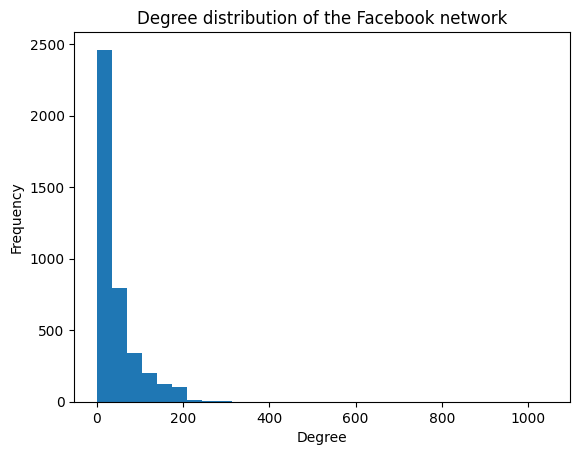

mean=43.691013


In [ ]:
degrees = [d for n, d in g.degree()]

plt.hist(degrees, bins=30)
plt.title("Degree distribution of the Facebook network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

mean_degree = sum(degrees) / len(degrees)
print(f"mean={mean_degree:.6f}")

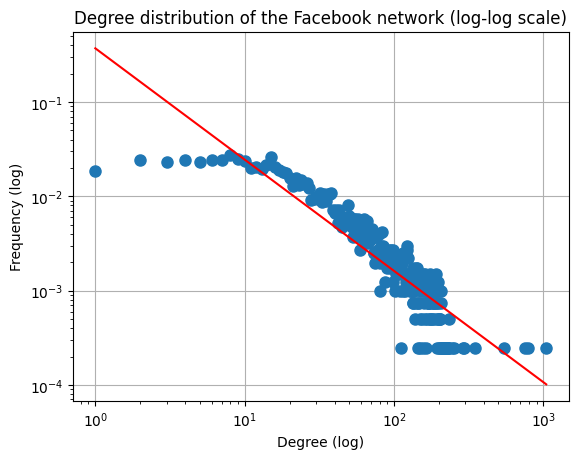

Slope of the fitted line: -1.180


In [ ]:
# degree_values, degree_counts = np.unique(degrees, return_counts=True)
# degree_prob = degree_counts / len(degrees)

# plt.loglog(degree_values, degree_prob, 'o', markersize=8)
# plt.title("Degree distribution of the Facebook network (log-log scale)")
# plt.xlabel("Degree (log)")
# plt.ylabel("Frequency (log)")
# plt.grid(True)

# slope, intercept = np.polyfit(np.log10(degree_values), np.log10(degree_prob), 1)

# plt.plot(degree_values, 10**(intercept + slope*np.log10(degree_values)), 'r')

# plt.show()

# print(f"Slope of the fitted line: {slope:.3f}")

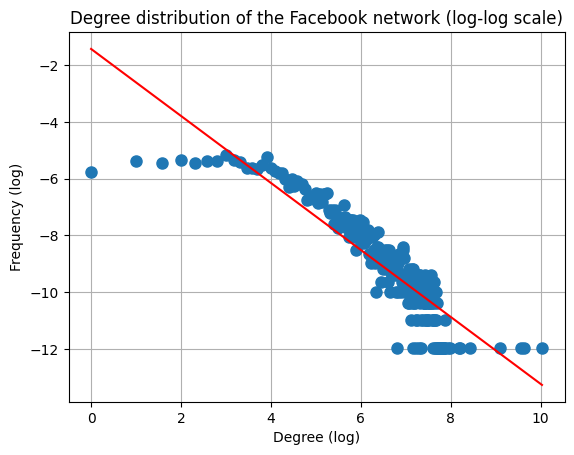

Slope: -1.180


In [ ]:
def plot_degree_distribution(g):

    degrees = [d for n, d in g.degree()]
    degree_values, degree_counts = np.unique(degrees, return_counts=True)
    degree_prob = degree_counts / len(degrees)

    non_zero_idxs = np.where(degree_prob != 0)
    x = np.log2(degree_values)[non_zero_idxs]
    y = np.log2(degree_prob)[non_zero_idxs]

    plt.plot(x, y, 'o', markersize=8)
    plt.title("Degree distribution of the Facebook network (log-log scale)")
    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.grid(True)
    linear_model = linregress(x, y)

    plt.plot(x, linear_model.intercept + linear_model.slope * x, 'r')

    plt.show()

    print(f"Slope: {linear_model.slope:.3f}")

plot_degree_distribution(g)

In [ ]:
def ego_graph(g, node, order=1, mindist=0):
    return nx.ego_graph(g, node, radius=order, center=True, undirected=True, distance=None)

node = list(g.nodes())[0]

g_ego = ego_graph(g, node, order=1, mindist=0)

number_of_nodes_ego = nx.number_of_nodes(g_ego)
number_of_edges_ego = nx.number_of_edges(g_ego)

print(f"Number of nodes: {number_of_nodes_ego}")
print(f"Number of edges: {number_of_edges_ego}")

Number of nodes: 348
Number of edges: 2866


In [ ]:
is_ego_connected = nx.is_connected(g_ego)
if is_ego_connected:
    diameter = nx.diameter(g_ego)
else:
    diameter = "undefined (graph not connected)"

print(f"Diameter of the graph: {diameter}")

Diameter of the graph: 2


In [ ]:
core_nodes = [n for n in g.nodes() if len(nx.single_source_shortest_path_length(g, n, cutoff=1)) > 200]

num_core_nodes = len(core_nodes)

average_degree = sum(g.degree(n) for n in core_nodes) / num_core_nodes

print(f"Number of core nodes: {num_core_nodes}")
print(f"Average degree of the core nodes: {average_degree:.6f}")

Number of core nodes: 41
Average degree of the core nodes: 277.439024


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

def plot_communities(g, node_id):
    partition = community_louvain.best_partition(g)
    pos = nx.spring_layout(g)
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(g, pos, nodelist=g.nodes, node_color=list(partition.values()), cmap=cmap, node_size=50)
    nx.draw_networkx_edges(g, pos, alpha=0.5)
    
    plt.title(f"Community Structure for Node ID={node_id}")
    plt.axis("off")
    plt.show()

target_nodes = [1, 108, 349, 484, 1087]
personalized_networks = [nx.ego_graph(g, node - 1, radius=1, center=True, undirected=True, distance=None) for node in target_nodes]

for i, node_id in enumerate(target_nodes):
    g_sub = personalized_networks[i]
    plot_communities(g_sub, node_id)

AttributeError: ignored

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig
from infomap import Infomap

def fast_greedy_community(graph):
    return nx.community.greedy_modularity_communities(graph)

def edge_betweenness_community(g):
    ig_g = ig.Graph.from_networkx(g)
    dendrogram = ig_g.community_edge_betweenness(directed=False)
    clusters = dendrogram.as_clustering()
    return [set(cluster) for cluster in clusters]

def infomap_community(g):
    im = Infomap()
    for e in g.edges:
        im.add_link(*e)
    im.run()
    communities = {}
    for node in im.nodes:
        if node.is_leaf and node.module_id not in communities:
            communities[node.module_id] = set()
        communities[node.module_id].add(node.node_id)
    return list(communities.values())

def plot_communities(g, node_id, method_name, communities):
    pos = nx.spring_layout(g)
    cmap = plt.cm.get_cmap('viridis', len(communities))
    plt.figure(figsize=(10, 10))
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(g, pos, nodelist=community, node_color=[cmap(i)], node_size=50)
    nx.draw_networkx_edges(g, pos, alpha=0.5)
    plt.title(f"Community Structure of {method_name} for Node ID={node_id}")
    plt.axis("off")
    plt.show()

def modularity(g, communities):
    return nx.community.modularity(g, communities)

target_nodes = [1, 108, 349, 484, 1087]
personalized_networks = [nx.ego_graph(g, node - 1, radius=1, center=True, undirected=True, distance=None) for node in target_nodes]

methods = [
    ('Fast-Greedy', fast_greedy_community),
    ('Edge-Betweenness', edge_betweenness_community),
    ('Infomap', infomap_community)
]

for i, node_id in enumerate(target_nodes):
    g_sub = personalized_networks[i]
    for method_name, method in methods:
        communities = method(g_sub)
        plot_communities(g_sub, node_id, method_name, communities)
        modularity_score = modularity(g_sub, communities)
        print(f"Modularity of {method_name} for Node ID={node_id}: {modularity_score:.3f}")

Output hidden; open in https://colab.research.google.com to view.